11:43:38 - cmdstanpy - INFO - Chain [1] start processing
11:43:39 - cmdstanpy - INFO - Chain [1] done processing
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k

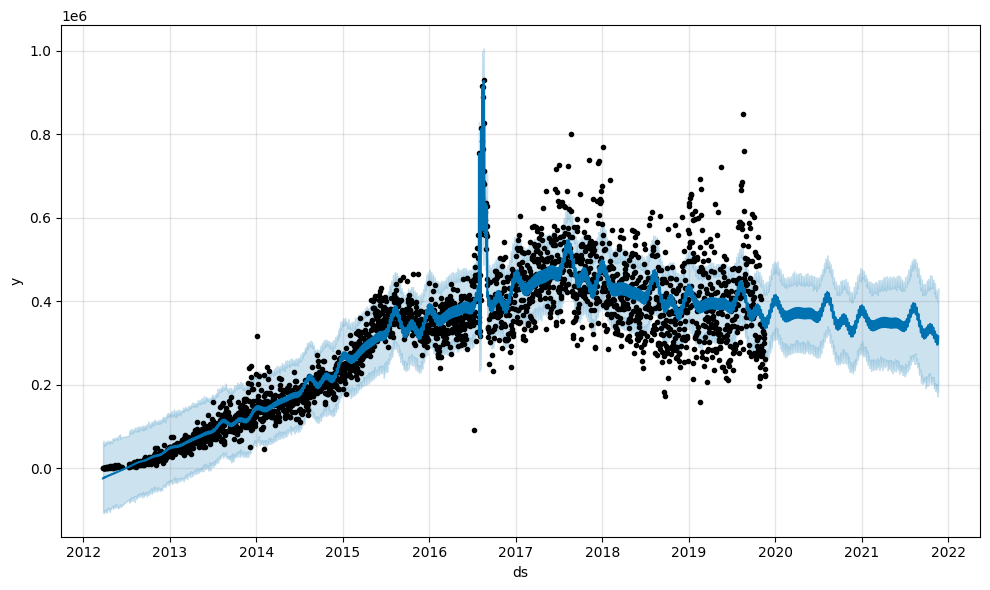

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('../data/instagram_natgeo.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

promo = pd.DataFrame({'holiday': 'Promo event',
                      'ds': pd.to_datetime(['2016-07-29']),
                      'lower_window': 0,
                      'upper_window': 34})
future_promo = pd.DataFrame({'holiday': 'Promo event',
                             'ds': pd.to_datetime(['2020-06-01']),
                             'lower_window': 0,
                             'upper_window': 34})
promos = pd.concat([promo, future_promo])


model = Prophet(seasonality_mode='multiplicative',
                holidays=promo,
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

11:44:16 - cmdstanpy - INFO - Chain [1] start processing
11:44:17 - cmdstanpy - INFO - Chain [1] done processing
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/hercules/BitMaybeWise/gitlab/python-playground/forecasting-time-series-data-with-prophet/.env/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k

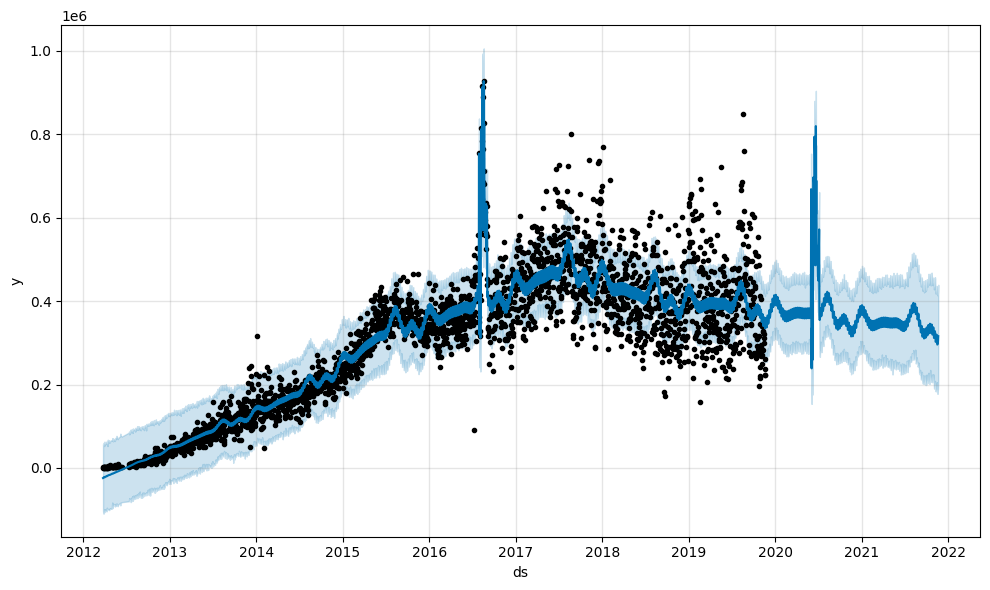

In [4]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=promos,
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()